# 算法案例
## GA

In [2]:
# 遗传算法案例
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize

problem_ga = get_problem("g1")

algorithm_ga = GA(
    pop_size=100,
    eliminate_duplicates=True)

res_ga = minimize(problem_ga,
               algorithm_ga,
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res_ga.X, res_ga.F))

Best solution found: 
X = [1.         1.         1.         1.         1.         1.
 1.         1.         1.         2.99994548 2.98724675 2.99782144
 1.        ]
F = [-14.98501368]


## ES 
### Parameters: 
* n_offsprings: 在每次迭代中创建的个体的数量。 
* pop_size: 从后代种群中存活下来的个体数量(非精英)  
* rule: 个体存活的规则(比率) 这将自动计算n_offsprings或pop_size。 
* phi: 预期收敛速度(通常为1.0)。
* gamma: 如果不是None，则使用这个作为长度尺度的差值创建一些个体。 
* sampling: 创建初始总体的抽样方法。 

In [3]:
# 进化策略
from pymoo.algorithms.soo.nonconvex.es import ES

problem_es = get_problem("ackley", n_var = 10)

algorithm_es = ES(n_offsprings=200, rule=1.0 / 7.0)

res_es = minimize(problem_es,
               algorithm_es,
               ("n_gen", 200),
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res_es.X, res_es.F))

Best solution found: 
X = [ 4.16017272e-08  2.05075037e-06 -1.45371994e-06  3.00645747e-06
 -3.48088699e-06 -8.84105527e-07  7.43515081e-07 -1.52894719e-06
  2.22753897e-07  1.54870696e-06]
F = [7.33188753e-06]


## CMA_ES

In [4]:
import numpy as np
from pymoo.algorithms.soo.nonconvex.cmaes import CMAES

problem_cmaes = get_problem("sphere")

algorithm_cmaes = CMAES(x0=np.random.random(problem_cmaes.n_var))

res_cmaes = minimize(problem_cmaes,
               algorithm_cmaes,
               seed=1,
               verbose=False)

print(f"Best solution found: \nX = {res_cmaes.X}\nF = {res_cmaes.F}\nCV= {res_cmaes.CV}")

Best solution found: 
X = [0.50000003 0.49999999 0.50000003 0.49999995 0.49999999 0.5
 0.5        0.50000002 0.49999996 0.49999996]
F = [8.72800085e-15]
CV= [0.]


## PSO

In [5]:
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems.single import Rastrigin

problem_pso = Rastrigin()

algorithm_pso = PSO()

res_pso = minimize(problem_pso,
               algorithm_pso,
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res_pso.X, res_pso.F))

Best solution found: 
X = [6.75220419e-07 1.76711118e-07]
F = [9.66480229e-11]


## NSGA_II

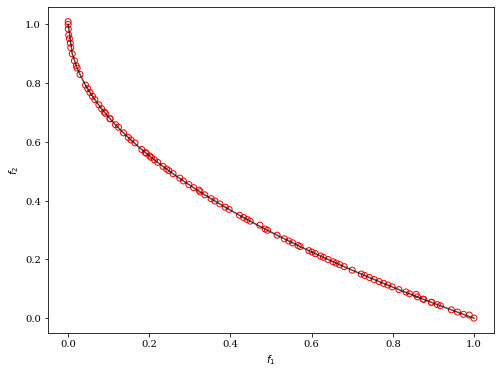

In [8]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.visualization.scatter import Scatter

problem_nsga_2_0 = get_problem("zdt1")

algorithm_nsga_2_0 = NSGA2(pop_size=100)

res_nsga_ii_0 = minimize(problem_nsga_2_0,
               algorithm_nsga_2_0,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem_nsga_2_0.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_nsga_ii_0.F, facecolor="none", edgecolor="red")
plot.show()

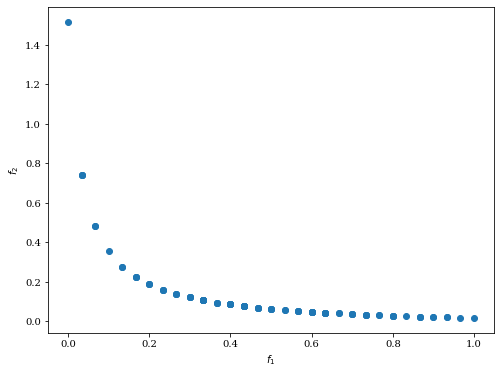

In [9]:
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling

problem_nsga_2_1 = get_problem("zdt5")

algorithm_nsga_2_1 = NSGA2(pop_size=100,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)

res_nsga_2_1 = minimize(problem_nsga_2_1,
               algorithm_nsga_2_1,
               ('n_gen', 500),
               seed=1,
               verbose=False)

Scatter().add(res_nsga_2_1.F).show()

## NSGA_III

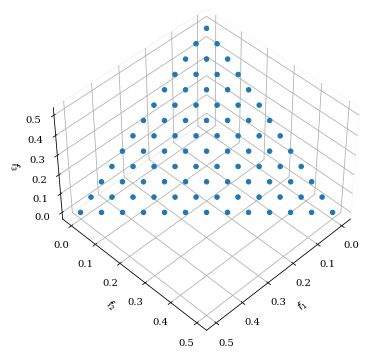

In [10]:
from pymoo.algorithms.moo.nsga3 import NSGA3


from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

# create the algorithm object
algorithm_nsga_3 = NSGA3(pop_size=92,
                  ref_dirs=ref_dirs)

# execute the optimization
res_nsga_3 = minimize(get_problem("dtlz1"),
               algorithm_nsga_3,
               seed=1,
               termination=('n_gen', 600))
               
Scatter().add(res_nsga_3.F).show()